# Cleaning and Analyzing Employee Exit Surveys.
![pic](EES.png)

## Introduction
Below are the Exit Surveys from the employees of 
- Department of Education, Training and Employment (DETE)
- Technical and Further Education (TAFE) institute, Queensland, Australia. 

With the help of the datasets given in the resources, We need to find the answers for the following questions:

## Objectives
We are asked to **combine the results** of the both surveys to answer these questions
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Resources
There are two datasets used to answer these questions.
- Dataset of the [Employee Exit Surveys of DETE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)
- Dataset of the [Employee Exit Surveys of TAFE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

---


In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading Datasets

dete = pd.read_csv('dete_survey.csv')
tafe = pd.read_csv('tafe_survey.csv')

---

## Exploring the Datasets

In [4]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [7]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
dete.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [9]:
tafe.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

#### Observations:

- Both datasets contain **a lot of columns** that deem unnecessary for our analysis.
- Some columns are serve the same purpose but have different names
- The `dete` dataframe contains 'Not Stated' values that indicate values are missing, but they are not represented as NaN

In [10]:
# Reloading the dete by assigning 'Non Stated' as NaN
dete = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [11]:
dete.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [12]:
tafe.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

We will be asking the Manager to help us to know the columns that could contribute. For now, we think that the following columns are of the most of the importance

From the **DETE** dataset, following columns look important and decisive

|Columns|Descriptiom|
|:-----|:----------|
|`ID`| An ID used to identify the participant of the survey|
|`SeparationType`| The reason why the person's employement ended|
|`Cease Date`| The year or month the person's employement ended|
|`DETE Start Date`| The year the person began employement with DETE|

From the **TAFE** dataset, following columns look important and decisive

|Columns|Descriptiom|
|:-----|:----------|
|`Record ID`| An ID used to identify the participant of the survey|
|`Reason for ceasing employment`| The reason why the person's employement ended|
|`LengthofServiceOverall. Overall Length of Service at Institute (in years)`| The year or month the person's employement ended|






To make the process easier, lets drop the columns that do not look adding significance to our goal and start with preparing the data for analysis

---
## Data Cleaning

To make our work easier, lets drop some columns that are not of significance to our work. Following columns are considered to be dropped for now 

In [13]:
dete.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [14]:
tafe.columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [15]:
# Dropping columns in dete
dete_updated = dete.drop(dete.columns[28:49], axis=1)

In [16]:
# Dropping columns in tafe
tafe_updated = tafe.drop(tafe.columns[17:66], axis=1)

In [17]:
# Checking that the columns were dropped successfully
print(dete_updated.columns)
print(tafe_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

- Dropping the columns which do not add value or purpose, are repeats, outdated or contain null values can help us having a cleaner and more relevant data.

Lets also rename the columns to more standardized column names

For `dete_updated` data, we will use vectorized string methods to rename columns to match following criteria
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

In [18]:
# Chaining vectorized string methods to rename the columns
dete_updated.columns = dete_updated.columns.str.lower().str.replace(' ','_').str.strip()

In [19]:
# Checking that all work was done
dete_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

For `tafe_updated`, we will rename some specific columns for now which are mentioned in the dictionary below 

In [20]:
tafe_cols_rename_dict = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [21]:
tafe_updated = tafe_updated.rename(tafe_cols_rename_dict, axis=1)

In [22]:
tafe_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [23]:
dete_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [24]:
tafe_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


---

## Answering the Questions

1. *Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?*

2. *Are younger employees resigning due to some kind of dissatisfaction? What about older employees?*

To answer these question, we will isolate all kinds of resignations from the `separationtype` column suggesting the reason of ceasation

We will do the operations for both datasets.

Beginning with `dete_updated`



In [25]:
# Checking values in seperationtype columns in DETE
dete_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

- We are interested in all types of Resignations here. Using Regex or Vectorized string method, we can retrieve all kinds of strings that contain the word *resignation*

In [26]:
pattern = r'Resignation'

# using DataFrame.copy() method to avoid 'SettingWithCopy' Warning
dete_resignations = dete_updated[dete_updated['separationtype'].str.contains(pattern)].copy()
dete_resignations.shape

(311, 35)

- Now we have a filtered dataset out of `dete_updated`, called `dete_resignations` which only contains the cases that have to do with resignations
Moving on to `tafe_updated`

In [27]:
# Checking values in seperationtype columns in TAFE
tafe_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [28]:
# pattern = r'Resignation'
# # using DataFrame.copy() method to avoid 'SettingWithCopy' Warning
# tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains(pattern)].copy()
# tafe_resignations.shape()

- We have some NaNs in `tafe_updated` which are hindering the operation.

In [29]:
tafe_updated['separationtype'].isnull().sum()

1

In [30]:
# Filtering out all the rows with NaN for separationtype column
tafe_updated_notnull = tafe_updated[tafe_updated['separationtype'].notnull()]

In [31]:
pattern = r'Resignation'

# using DataFrame.copy() method to avoid 'SettingWithCopy' Warning
tafe_resignations = tafe_updated_notnull[tafe_updated_notnull['separationtype'].str.contains(pattern)].copy()
tafe_resignations.shape

(340, 23)

In [32]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [33]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


- **So here is a summary of what we have done so far:**
    - For both DataFrames `dete` and `tafe`, we picked the columns that looked critical to our purpose, and called them `dete_updated` and `tafe_updated` respectively
    - In these updated datasets, we looked for the samples (rows) those `separationtype` (The reason for ending the employement) is **resignation**
    
Next step is to look for the **period of time** an employee served for. For that, we will have to get into the columns that stand for the dates an employee had his employment started and ended. 

In [34]:
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

- In the columns `cease_date` we are ending up with not-so-good formatting. A large number of dates do not have a month given with the year. 
- We also have some NaNs, which will be dealt later

We can not add the month ourself. So It might come handy if we take out months altogether and rely on year only.

In [35]:
# converting the col in strings 
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(str)

# Just extract the years using vectorized string method
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:]

# convert them to floats and ASSIGN them back 
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [36]:
# Checking if the changes were successfully applied
dete_resignations['cease_date'].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

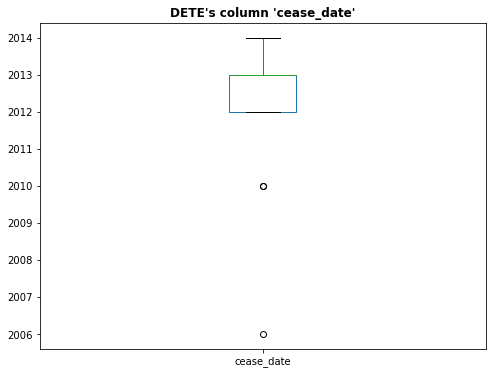

In [37]:
plt.figure(figsize=(8,6))
dete_resignations['cease_date'].plot.box()
plt.title('DETE\'s column \'cease_date\'', weight='bold')
plt.show

- In DETE's columns `cease_date` that tells us about the year an employee's employement ended, we can see that our dataset has mostly the reginations that took place after 2012. However, there are some outliers too.

In [38]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

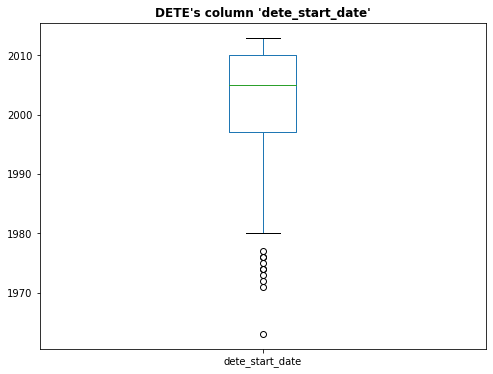

In [39]:
plt.figure(figsize=(8,6))
dete_resignations['dete_start_date'].plot.box()
plt.title('DETE\'s column \'dete_start_date\'', weight='bold')
plt.show()

- We can see that the available data in `dete_start_Date` ranges from 1963 and the last resignation registered in our data is somewhere in 2013. (This can be seen in a the second last cell)
- There is a presence of Outliers as well as some NaNs

Lets move on to the `tafe_resignations`

In [40]:
tafe_resignations['cease_date'].value_counts(dropna=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64

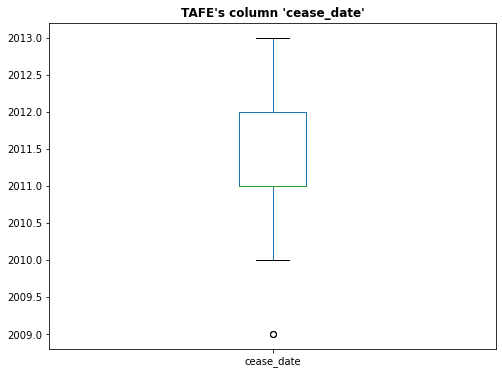

In [41]:
plt.figure(figsize=(8,6))
tafe_resignations['cease_date'].plot.box()
plt.title('TAFE\'s column \'cease_date\'', weight='bold')
plt.show()

- Pretty same situation here as well. We have one outlier value and a few NaNs. Most of the data looks good to go with.

**`tafe_resignations` do not have a column about the starting date of an employement.** However it already has a column that is for the total period of employement and the column is **`institute_service`**

So now we need to calculate the same values for `dete_resginations`. 

In [42]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [43]:
dete_resignations['institute_service'].value_counts(dropna=False).sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
NaN     38
Name: institute_service, dtype: int64

In [44]:
tafe_resignations['institute_service'].value_counts(dropna=False).sort_index()

1-2                   64
11-20                 26
3-4                   63
5-6                   33
7-10                  21
Less than 1 year      73
More than 20 years    10
NaN                   50
Name: institute_service, dtype: int64

- Years of Service, `institute_service` of TAFE resignations are formatted differently. Here we have the binning done already.
- `institute_service` of both datasets contain a number of null values.

As of now, we are almost done with finding out information about the years of service of employees who resigned from their jobs. Lets move ahead 

---

## Identify any employees who resigned because they were dissatisfied

Following are the columns in DETE's DataFrame `dete_updated` that reveal information about Dissatisfaction:

1. `job_dissatisfaction`
2. `dissatisfaction_with_the_department`
3. `physical_work_environment`
4. `lack_of_recognition`
5. `lack_of_job_security`
6. `work_location`
7. `employment_conditions`
8. `work_life_balance`
9. `workload`

Following are the columns in TAFE's DataFrame `tafe_updated` that reveal information about Dissatisfaction:

1. `Contributing Factors. Dissatisfaction`
2. `Contributing Factors. Job Dissatisfaction`


Lets take a peek into these columns

In [45]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].head()

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-


In [46]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [47]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

- The frequency tables of the specified columns in `tafe_resignation` tell that 
    - around 8 entries are NaNs
    - 55-65 responses are in approval represented by the name of the each column.
    - 270-280 responses are in denial and represented by **-** sign in both columns.
    
Lets look for the patterns for the columns we specified of `dete_resignations`

In [48]:
dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department', 
                   'physical_work_environment', 'lack_of_recognition', 
                   'lack_of_job_security','work_location','employment_conditions', 
                   'work_life_balance','workload']].head()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False


In [49]:
for col in ['job_dissatisfaction','dissatisfaction_with_the_department', 
            'physical_work_environment', 'lack_of_recognition', 
            'lack_of_job_security','work_location','employment_conditions', 
            'work_life_balance','workload']:
    print(dete_resignations[col].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
False    305
True       6
Name: physical_work_environment, dtype: int64
False    278
True      33
Name: lack_of_recognition, dtype: int64
False    297
True      14
Name: lack_of_job_security, dtype: int64
False    293
True      18
Name: work_location, dtype: int64
False    288
True      23
Name: employment_conditions, dtype: int64
False    243
True      68
Name: work_life_balance, dtype: int64
False    284
True      27
Name: workload, dtype: int64


- The responses in the specified columns of `dete_resignation` are registered as True or False. There are no null values for any of the specified column.

As it can be seen that the responses are recorded in different way for each of the `tafe_resignations` and `dete_resignations`.

We will be combining these DataFrames. Therefore it will be helpful to have these reponses represented in the same way. 


So **lets make a function** to achieve that


In [50]:
def to_bool(element):
        if pd.isnull(element):
            return np.nan
        elif element == '-':
            return False
        else:
            return True

In [51]:
tafe_resignations[['Contributing Factors. Dissatisfaction',
                   'Contributing Factors. Job Dissatisfaction']].applymap(to_bool).head()

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False


#### Finally,
Lets have a new columns called `dissatisfied` for each of the dataset, that marks every person who has **resigned due to any dissatisfaction**

In [52]:
# Creating a new column, assigning the results using any()
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                       'Contributing Factors. Job Dissatisfaction']].applymap(to_bool).any(axis=1, skipna=False)


In [53]:
# create a copy of the results and avoid the SettingWithCopy Warning
tafe_resignations_updated = tafe_resignations.copy()
tafe_resignations_updated['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [54]:
# Creating a new column, assigning the results using any()
dete_resignations['dissatisfied'] = dete_resignations[[
    'job_dissatisfaction','dissatisfaction_with_the_department',
    'physical_work_environment', 'lack_of_recognition',
    'lack_of_job_security','work_location',
    'employment_conditions','work_life_balance',
    'workload']].any(axis = 1,skipna = False)

dete_resignations_updated = dete_resignations.copy()

dete_resignations_updated['dissatisfied'].value_counts(dropna= False)

False    162
True     149
Name: dissatisfied, dtype: int64

Column 'dissatisfied' has been successfully created in both datasets consisting values True, False and np.nan to bundle up all the resignations caused by any dissatisfaction

- **So here is a summary of what we have done so far:**
    - <font color = 'grey'>For both DataFrames `dete` and `tafe`, we picked the columns that looked critical to our purpose, and called them `dete_updated` and `tafe_updated` respectively
    - In these updated datasets, we looked for the samples (rows) those `separationtype` (The reason for ending the employement) is **resignation**
    - <font color = 'black'>To find out how long an employee had been at work, we found out the **years of service**, called `institute_service` for the induviduals in our dataset. 
    - Columns that are associated with the **resignation due to any dissatisfaction** were choosen and cleaned.
    - Additionally, we introduced a new column called `dissatisfied` in each dataframe to mark induviduals who resigned due to any kind of dissatisfaction.

---

## Combine the DataSets
Here we will combine both datasets. For the sake of maintaining the distinction, we will introduce another column to the both of our datasets called `institute`, that will compromise the name of the dataset it belongs to.

In [55]:
# Adding a column 'institute' to both of the datasets, each showing its parent dataset's name i-e, DETE or TAFE 
dete_resignations_updated['institute'] = 'DETE'
tafe_resignations_updated['institute'] = 'TAFE'

#### Having done that, lets move to combine the datasets in a DataFrame called `combined` and explore it a bit as well

In [56]:
# Combining datasets
combined = pd.concat([dete_resignations_updated, tafe_resignations_updated], ignore_index=True)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [58]:
combined.notnull().sum()

id                                                     651
separationtype                                         651
cease_date                                             635
dete_start_date                                        283
role_start_date                                        271
position                                               598
classification                                         161
region                                                 265
business_unit                                           32
employment_status                                      597
career_move_to_public_sector                           311
career_move_to_private_sector                          311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    3

- Considering the columns with the nnumber of **NaNs > 500** to be **not-so-useful**, lets **drop** those columns.
To do so, we will create another version of the DataFrame `combined`, called `combined_updated`

In [59]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [60]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


Recall that the column `institute_service` of TAFE contained values with **binning** done beforehand.
To make comparisons, either these values should be unbinned or the values of DETE should also be binned in same way. 
Lets choose the latter option
#### Cleaning up institute service column

In [61]:
# To review
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


It is a bit messy situation here in institute_service. We will use **Categoricals** such as
- `New`: Less than 3 years at a company
- `Experienced`: 3-6 years at a company
- `Established`: 7-10 years at a company
- `Veteran`: 11 or more years at a company

In [62]:
# Changing the dtype from int64 to str and assigning the result back
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [63]:
combined_updated['institute_service'].unique()

array(['7.0', '18.0', '3.0', '15.0', '14.0', '5.0', 'nan', '30.0', '32.0',
       '39.0', '17.0', '9.0', '6.0', '1.0', '35.0', '38.0', '36.0',
       '19.0', '4.0', '26.0', '10.0', '8.0', '2.0', '0.0', '23.0', '13.0',
       '16.0', '12.0', '21.0', '20.0', '24.0', '33.0', '22.0', '28.0',
       '49.0', '11.0', '41.0', '27.0', '42.0', '25.0', '29.0', '34.0',
       '31.0', '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

In [64]:
# Using Vectorized string method and a bit of ReGex
pattern_to_catch = r'(\d+)'

# A new column
combined_updated['institute_service_updated'] = combined_updated['institute_service'].str.extract(pattern_to_catch)

In [65]:
combined_updated['institute_service_updated'].value_counts(dropna=False)

1      159
NaN     88
3       83
5       56
7       34
11      30
0       20
6       17
20      17
4       16
2       14
9       14
8        8
13       8
15       7
12       6
22       6
10       6
17       6
14       6
16       5
18       5
24       4
23       4
21       3
32       3
39       3
19       3
36       2
25       2
26       2
30       2
28       2
33       1
42       1
31       1
27       1
38       1
29       1
34       1
41       1
35       1
49       1
Name: institute_service_updated, dtype: int64

In [66]:
def years_to_category(years):
    if years > 11:
        return 'Veteran'
    elif 7 < years < 11:
        return 'Established'
    elif 3 < years < 7:
        return 'Experienced'
    elif pd.isnull(years):
        return np.nan
    else:
        return 'New'

**Lets apply this function to the column `institute_service_updated` using apply method and assign the results to a new column, named `sevice_cat`**

In [67]:
# Strings can't be compared numerically so , lets convert the column back to float
combined_updated['institute_service_updated'] = combined_updated['institute_service_updated'].astype(float)

In [68]:
# Apply the funtion
combined_updated['service_cat'] = combined_updated['institute_service_updated'].apply(years_to_category)

In [69]:
combined_updated['service_cat'].head()

0        New
1    Veteran
2        New
3    Veteran
4        New
Name: service_cat, dtype: object

- **So here is a summary of what we have done so far:**
    - <font color = 'grey'>For both DataFrames `dete` and `tafe`, we picked the columns that looked critical to our purpose, and called them `dete_updated` and `tafe_updated` respectively
    - In these updated datasets, we looked for the samples (rows) those `separationtype` (The reason for ending the employement) is **resignation**
    - To find out how long an employee had been at work, we found out the **years of service**, called `institute_service` for the induviduals in our dataset. 
    - Columns that are associated with the **resignation due to any dissatisfaction** were choosen and cleaned.
    - Additionally, we introduced a new column called `dissatisfied` in each dataframe to mark induviduals who resigned due to any kind of dissatisfaction.
    - <font color = 'black'> Both datasets were combined after each of there rows were assigned with the parent dataset.
    - `combined` DataFrame got updated with `combined_updated`. Updation was about reducing it to the columns that contain minimum 500 valid values. (Non-NaNs)
    - In the `combined_updated`, we provided binning treatment to the column `institute_service`. Categories followed by the binning were assigned to new column, `service_cat`
---

## Analysing Dissatisfied employees

Now we are having a hold on much cleaner data. 
The dataset we are having is about the employees resigned. 
Lets look for the employees whose resignations came out of some dissatisfaction. To check that, lets get into the column `dissatisfied`

As mentioned that we are done with the larger part of data cleaning, small issues will be dealt along the way

In [70]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

- Since these NaNs are not in a great number, lets replace them with `True`, as 'True' is the most occuring value in this column

In [71]:
combined_updated['dissatisfied'].fillna(True, inplace=True)

The column `dissatisfied` contains boolean values. Methods such as df.pivot_table actually treat Boolean values as integers, so a True is considered as 1 and False as 0. This means that we can aggregate the `dissatisfied` column and calculate the number of people in each group.

#### At what career stages the employees are more prone to take retirement due to dissatisfaction?

In [72]:
pv_dissatisfied = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

In [73]:
pv_dissatisfied

,dissatisfied
service_cat,
Established,0.607143
Experienced,0.404494
New,0.300000
Veteran,0.556604


In [74]:
def plot_bar(x, y, xlabel, ylabel, title):
    
    fig, ax = plt.subplots(figsize=(12, 5))
    # Save the chart so we can loop through the bars below.
    bars = ax.bar(x, y*100) # Multiply by 100 to get Y as percentage

    # Axis formatting.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)
    
    # Add text annotations to the top of the bars.
    bar_color = bars[0].get_facecolor()
    for bar in bars:
        ax.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height() + 0.9,
          round(bar.get_height(), 1),
          horizontalalignment='center',
          color='grey',
          weight='bold'
      )


    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    ax.set_xlabel(xlabel, fontsize=12, labelpad=15, color='#333333')
    ax.set_ylabel(ylabel, fontsize=12, labelpad=15, color='#333333')
    ax.set_title(title, fontsize=20, pad=15, color='#333333',
                 weight='bold')

    fig.tight_layout()

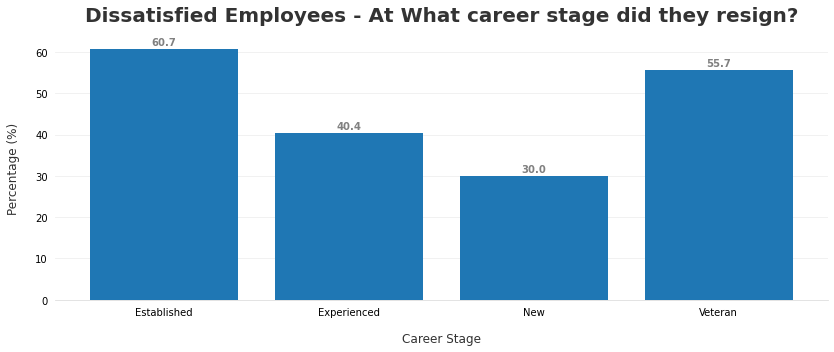

In [75]:
plot_bar(pv_dissatisfied.index, pv_dissatisfied['dissatisfied'], 
         'Career Stage', 
         'Percentage (%)',
         'Dissatisfied Employees - At What career stage did they resign?' )

- We can see that the employees that are `Established` and `Veterans` i-e, **with 7 or more years** of experience are most likely to resign due to dissatisfaction
- Beginner employeers, `New`, who have **less than 3 years of experience** are half as likely to resign as the seniors with 7 or more years of experience 


#### Of which Age most of employees are more prone to take retirement due to dissatisfaction?

In [76]:
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

- We can see some trouble here. There are many repeatative entries that must have taken place while we were combining the datasets. 
- One way to go with it is to introduce a mapping dictionary that correctly maps each of them. However, smarter way would be to identify the troublesome pattern i-e. **double spaces** and replace them with a single **hyphen**
- the other issue could arise with `56 or older`, `56-60` and `61 or older`. Most accurate way to resolve this would be to replace all three with `56 or older`

In [77]:
# to fix the age column, we replace double spaces with hyphen
combined_updated['age'] = combined_updated['age'].str.replace('  ', '-')
combined_updated['age'] = combined_updated['age'].str.replace('56-60', '56 or older').str.replace('61 or older', '56 or older')
combined_updated['age'].value_counts()

41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
20 or younger    10
Name: age, dtype: int64

In [78]:
pv_age = combined_updated.pivot_table(index='age', values='dissatisfied')
pv_age

,dissatisfied
age,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56 or older,0.423077


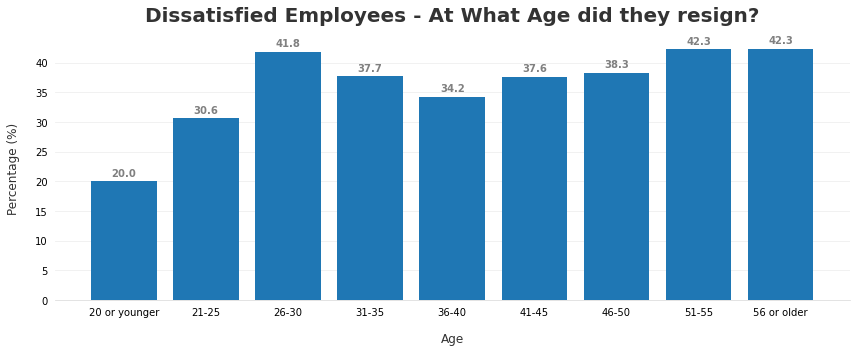

In [79]:
plot_bar(pv_age.index, pv_age['dissatisfied'], 
         'Age', 
         'Percentage (%)',
         'Dissatisfied Employees - At What Age did they resign?' )

- From the plot we can see that for the **age groups ranging from 20 to 30, the relationship between the age and resignation due to dissatisfaction is directly propotional**
- The relationship doesn't maintain its any direction afterwards.
- However, we still see that the most senior age groups **51 and above** have the highest tendency to resign due to dissatsifaction

### Employees who worked for a long time and resigned due to dissatisfaction

In [80]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_updated,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,7.0,New
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,18.0,Veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,3.0,New
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,15.0,Veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,3.0,New


**So far we saw that employees who were more experienced, hence more senior in terms of age as well are most likely to resign.
This raises many interesting questions. Among the questions are that**
1. whether this trend is common in both institutes or is there any difference?
2. Is there any difference with regard to the gender?
3. Are there any positions held by the seniors at which they were most likely to resign

#### Are the resigning Seniors dissatisfied from both institutes?

In [81]:
combined_seniors = combined_updated[(combined_updated['service_cat'] == 'Veteran')|(combined_updated['service_cat'] == 'Established')]
combined_seniors.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_updated,service_cat
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,18.0,Veteran
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,15.0,Veteran
5,13.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14.0,False,DETE,14.0,Veteran
8,21.0,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,56 or older,30.0,False,DETE,30.0,Veteran
9,22.0,Resignation-Other reasons,2012.0,Cleaner,Permanent Part-time,Female,51-55,32.0,False,DETE,32.0,Veteran


In [82]:
pv_seniors_institute = combined_seniors.pivot_table(index='institute', values='dissatisfied')
pv_seniors_institute

,dissatisfied
institute,
DETE,0.572581
TAFE,0.500000


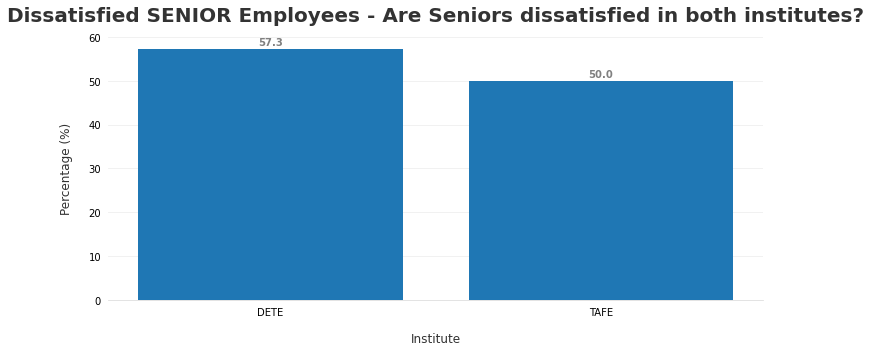

In [83]:
plot_bar(pv_seniors_institute.index, pv_seniors_institute['dissatisfied'], 
         'Institute', 
         'Percentage (%)',
         'Dissatisfied SENIOR Employees - Are Seniors dissatisfied in both institutes?' )

- Resigning Seniors (`Established`and `Veterans`) got dissatisfied in both of the institutions, Department of Education, Training and Employment `DETE` and Technical and Further Education `TAFE`. 

#### Is there any difference between the Seniors with respect to the gender resigning due to disappointment?

In [84]:
pv_seniors_gender = combined_seniors.pivot_table(index='gender', values='dissatisfied')
pv_seniors_gender

,dissatisfied
gender,
Female,0.556701
Male,0.606061


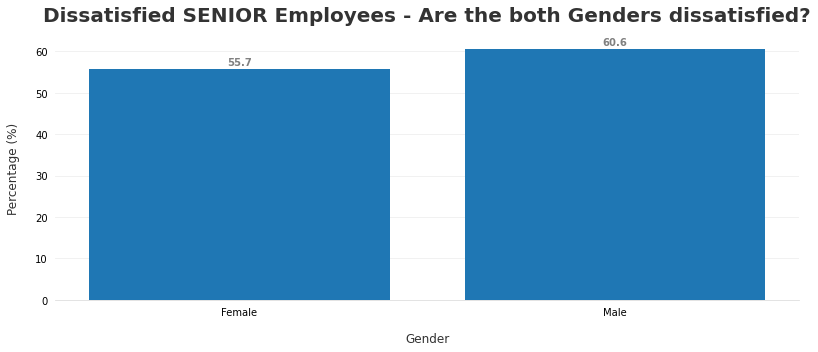

In [85]:
plot_bar(pv_seniors_gender.index, pv_seniors_gender['dissatisfied'], 
         'Gender', 
         'Percentage (%)',
         'Dissatisfied SENIOR Employees - Are the both Genders dissatisfied?' )

- Senior Males are slightly more in numbers who resgined with dissatisfaction than the Senior Females.
- However the difference is not enough to make a difference. For this our conclusion would stay the same that **Gender doesn't play any significant role in seniors resigning due to dissatisfaction**

#### Are there some positions at which the seniors are most likely to resign from dissatisfaction?

In [86]:
pv_seniors_position = combined_seniors.pivot_table(index='position', values='dissatisfied')
pv_seniors_position

,dissatisfied
position,
Administration (AO),0.500000
Business Service Manager,0.000000
Cleaner,0.545455
Guidance Officer,1.000000
Head of Curriculum/Head of Special Education,0.571429
Other,1.000000
Professional Officer (PO),0.000000
Public Servant,0.714286
School Administrative Staff,0.500000


In [87]:
combined_seniors['position'].value_counts()

Teacher                                                    64
Teacher Aide                                               20
Cleaner                                                    11
Public Servant                                              7
Head of Curriculum/Head of Special Education                7
Teacher (including LVT)                                     7
Technical Officer                                           3
Guidance Officer                                            3
Schools Officer                                             2
Administration (AO)                                         2
School Administrative Staff                                 2
School Based Professional Staff (Therapist, nurse, etc)     1
Business Service Manager                                    1
Professional Officer (PO)                                   1
Other                                                       1
Name: position, dtype: int64

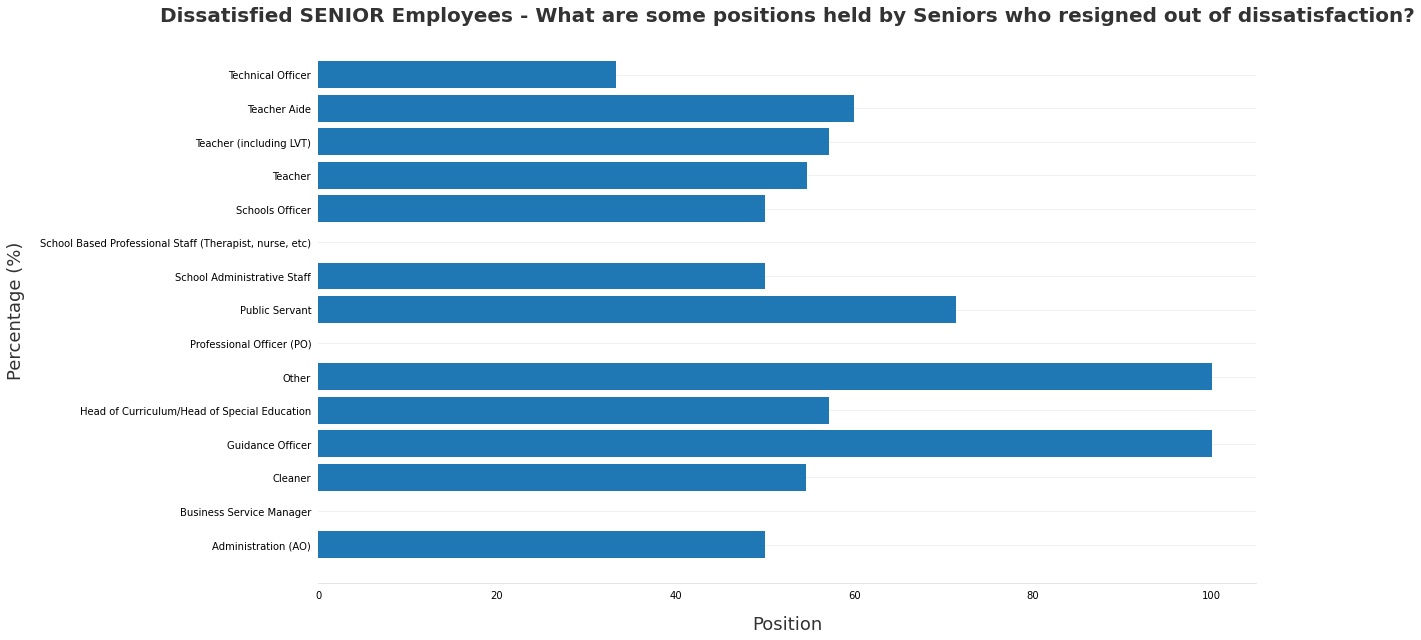

In [88]:
fig, ax = plt.subplots(figsize=(19, 9))
# Save the chart so we can loop through the bars below.
bars = ax.barh(pv_seniors_position.index, pv_seniors_position['dissatisfied']*100) # Multiply by 100 to get Y as percentage

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)




# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Position', fontsize=18, labelpad=15, color='#333333')
ax.set_ylabel('Percentage (%)', fontsize=18, labelpad=15, color='#333333')
ax.set_title('Dissatisfied SENIOR Employees - What are some positions held by Seniors who resigned out of dissatisfaction?', fontsize=20, pad=15, color='#333333',
             weight='bold')

fig.tight_layout()

- Though this visualization doesn't tell us much about the trends since the data is not large enough, we can see that **all the 'Guidance Officers'** resigned due to dissatisfaction. More than the half of the Seniors who were at following positions, resigned due to dissatisfaction.
    - Cleaner
    - Guidance Officers
    - Head of Curriculum/Head of Special Education
    - Public Servant
    - Teacher
    - Teacher (including LVT)
    - Teacher Aide

---

### Finally, lets move on to the 
- employees who worked for a short period of times
- emplyees who were young
#### Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?

In [93]:
combined_juniors = combined_updated[(combined_updated['service_cat'] == 'New')]
combined_juniors.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_updated,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,7.0,New
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,3.0,New
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,3.0,New
13,28.0,Resignation-Other employer,2012.0,Public Servant,Permanent Full-time,Female,21-25,7.0,False,DETE,7.0,New
16,38.0,Resignation-Other reasons,2012.0,Teacher Aide,Temporary Part-time,Female,21-25,1.0,False,DETE,1.0,New


In [138]:
vc_dissatisfied = combined_juniors['dissatisfied'].value_counts(normalize=True)
ser_dissatisfied = pd.Series(vc_dissatisfied)
ser_dissatisfied

False    0.7
True     0.3
Name: dissatisfied, dtype: float64

<font color='blue'> For the following chart, I took inspiration from an [article](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) of [Kevin Amipara](https://medium.com/@kvnamipara). Thank a lot for posting such a wonderful and easy to follow post. 

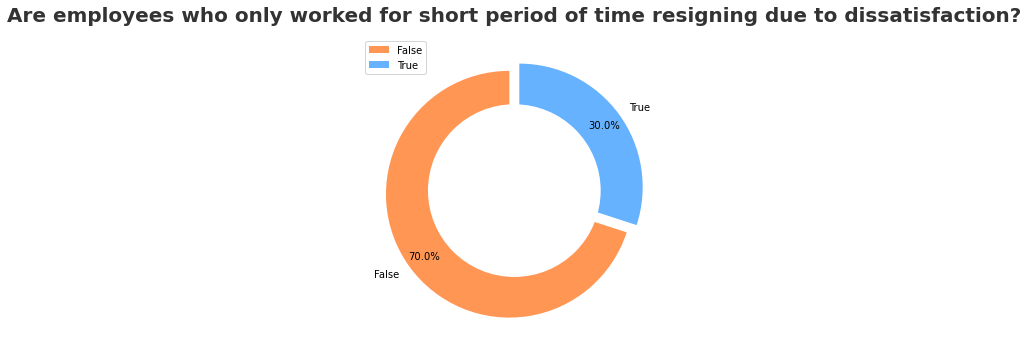

In [152]:
fig = plt.figure(figsize=(35,5))
#colors
colors = ['#ff9654','#66b2ff','#94ff99','#ffcc99']

#explsion
explode = (0.05,0.05)
 
plt.pie(vc_dissatisfied, colors = colors, labels=vc_dissatisfied.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add details
plt.title('Are employees who only worked for short period of time resigning due to dissatisfaction?',fontsize=20, pad=15, color='#333333',
             weight='bold')
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
- From the plot above, we can clearly see that less than a third of new employees (with an experience of less than 3 years) resigned due to dissatisfaction

#### Are younger employees resigning due to some kind of dissatisfaction.
Lets consider the people within 35 years to be younger ones

In [167]:
pv_age[:4]

,dissatisfied
age,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049


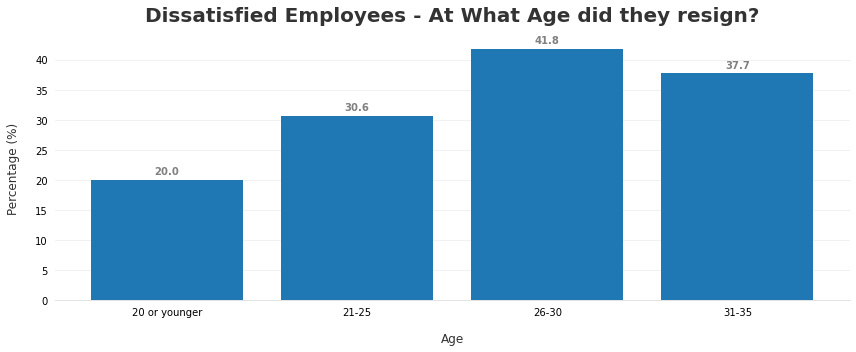

In [166]:
plot_bar(pv_age[:4].index, pv_age[:4]['dissatisfied'], 
         'Age', 
         'Percentage (%)',
         'Dissatisfied Employees - At What Age did they resign?' )

- As it was seen earlier, the resignations due to dissatsifaction **increases with age till the age of 30**.
- **Youngest people (20-25 and younger) doesn't seem** much to be resigning due to dissatisfaction

---

## Conclusions

- It doesn't seem very often that people with low experience (less than 3 years) resigned due to some dissatisfaction
- Resignations due to dissatisfaction are associated with experience and age of employees
    - Till the age of 30 years, the relationship between resignations due to some dissatisfaction and the age of an employee is of a kind
    - Within the senior employees resigning due to dissatisfaction, there is no significant impact of either Gender or the Institute the worked at (DETE or TAFE)
    - Although we are not with enough data to support our conclusion for every position, it can be generally said that a considerable number of Senior Teachers, their aides and associates resigned due to some dissatisfaction. Same can be said about Cleaners and Guidance Officers
    
  